### ML Classification Models

#### Models to Test
- Random Forest Classifier [RandomForestClassifier]
- XGBoost [GradientBoostingClassifier]
- Logistic Regression [LogisticRegression]
- Linear Regression [LinearRegression]
- CART (Classsification and Regression Trees) [tree.DecisionTreeClassifier]


In [111]:
# Basic packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import classification_report,confusion_matrix
import itertools
import shap

In [12]:
# Import Data and Create DataFrames
all_labs = pd.read_csv('/Users/emmadyer/Desktop/data/all_labs_imputed.csv')

# IBD and Healthy Patients
# Healthy-0, IBD-1
ibd_vs_healthy = all_labs.copy()
ibd_vs_healthy['ibd_disease_code'] = ibd_vs_healthy['ibd_disease_code'].replace([2], 1)
ibd_vs_healthy = ibd_vs_healthy.drop('patient_id', axis=1)

# UC and CD Patients
# UC-0, CD-1
uc_vs_cd = all_labs.copy()
ibd_codes = [1,2]
uc_vs_cd = uc_vs_cd[uc_vs_cd['ibd_disease_code'].isin(ibd_codes)]
uc_vs_cd['ibd_disease_code'] = uc_vs_cd['ibd_disease_code'].replace([2], 0)
uc_vs_cd = uc_vs_cd.drop('patient_id', axis=1)

# CD and Healthy Patients
# Healthy-0, CD-1
cd_vs_healthy = all_labs.copy()
cd_healthy_codes = [1,0]
cd_vs_healthy = cd_vs_healthy[cd_vs_healthy['ibd_disease_code'].isin(cd_healthy_codes)]
cd_vs_healthy = cd_vs_healthy.drop('patient_id', axis=1)

# UC and Healthy Patients
# Healthy-0, UC-1
uc_vs_healthy = all_labs.copy()
uc_healthy_codes = [2,0]
uc_vs_healthy = uc_vs_healthy[uc_vs_healthy['ibd_disease_code'].isin(uc_healthy_codes)]
uc_vs_healthy['ibd_disease_code'] = uc_vs_healthy['ibd_disease_code'].replace([2], 1)
uc_vs_healthy = uc_vs_healthy.drop('patient_id', axis=1)

### Random Forest Classifier (with CRP)

In [49]:
# X = data to train on 
# y = outcome of interest ('target')

X = ibd_vs_healthy.iloc[:, :-1]
X = X.fillna(0)
y = ibd_vs_healthy.loc[:, 'ibd_disease_code']
X_col_names = list(ibd_vs_healthy.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [8]:
# Random Forest Classifier


# Identify the best number of trees
# n_estimators = list(range(10,1000,50))
# Best Number of Estimators: 160
# Best Number of Max Features: 9

n_estimators = list(range(1,20,1))

rfcs = []
for n in n_estimators:
    rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=9)
    rfc.fit(X_train, y_train)
    rfcs.append(rfc)

train_accuracy = [rfc.score(X_train, y_train) for rfc in rfcs]
test_accuracy = [rfc.score(X_test, y_test) for rfc in rfcs]

# Identify where the test error is minimized
best_n_estimators = n_estimators[np.argmax(test_accuracy)]
rfc_best_train_accuracy = train_accuracy[np.argmax(test_accuracy)]
rfc_best_test_accuracy = test_accuracy[np.argmax(test_accuracy)]

print(f"The n_estimators value that maximizes the test set accuracy is: {best_n_estimators}")
print("Train Accuracy: ", rfc_best_train_accuracy)
print("Test Accuracy: ", rfc_best_test_accuracy)


        


The n_estimators value that maximizes the test set accuracy is: 9
Train Accuracy:  1.0
Test Accuracy:  0.9913978494623656


In [ ]:
rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=9)
rfc.fit(X_train, y_train)
feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)



### Feature Importance IBD vs. Healthy (with CRP)

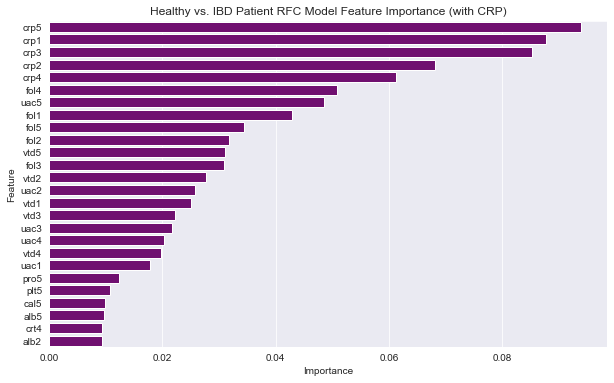

In [146]:
df = ibd_vs_healthy

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)


sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='purple').set(ylabel= "Feature", xlabel= "Importance", title="Healthy vs. IBD Patient RFC Model Feature Importance (with CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/healthy_ibd_barplot.png', dpi=300)

### Feature Importance UC vs. CD (with CRP)

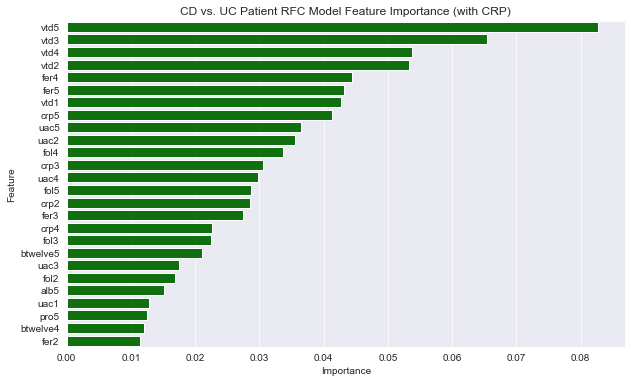

In [144]:
df = uc_vs_cd

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='green').set(ylabel= "Feature", xlabel= "Importance", title="CD vs. UC Patient RFC Model Feature Importance (with CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/cd_uc_barplot.png', dpi=300)

### Feature Importance UC vs. Healthy (with CRP)

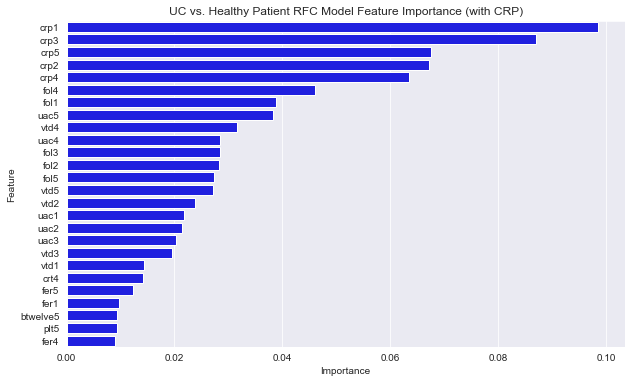

In [143]:
df = uc_vs_healthy

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='blue').set(ylabel= "Feature", xlabel= "Importance", title="UC vs. Healthy Patient RFC Model Feature Importance (with CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/uc_healthy_barplot.png', dpi=300)

### Feature Importance CD vs. Healthy (with CRP)

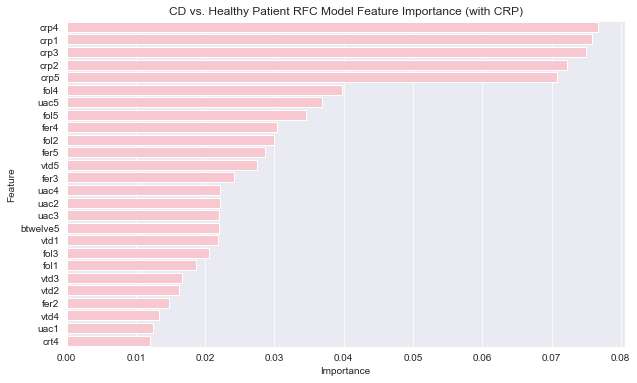

In [142]:
df = cd_vs_healthy

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='pink').set(ylabel= "Feature", xlabel= "Importance", title="CD vs. Healthy Patient RFC Model Feature Importance (with CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/cd_healthy_barplot.png', dpi=300)

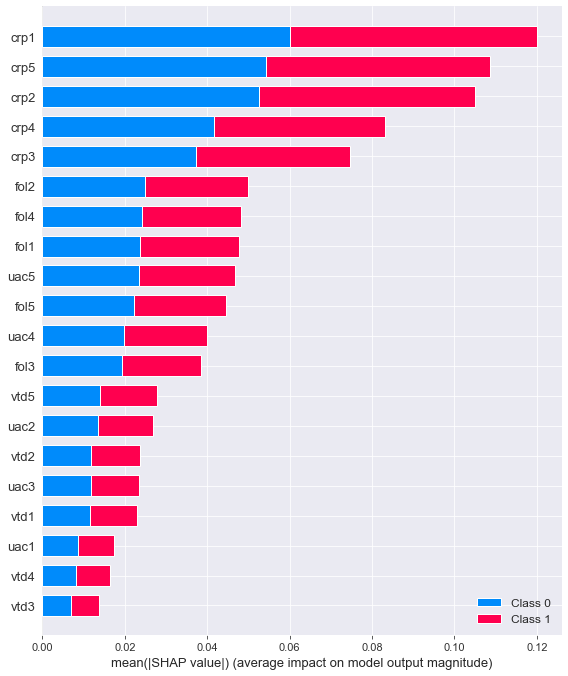

In [73]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_train, y_train)
shap.summary_plot(shap_values, X_train)

In [ ]:
# clean up the shap values to be more readable
shap_val_df = pd.DataFrame(shap_values)
shap_val_df.columns = X_col_names
shap_val_df.head()

### All Random Forest Classifier AUROC (with CRP)

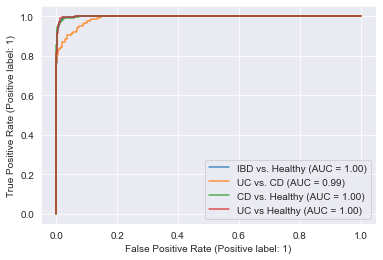

In [110]:
# Test Random Forest on All Datasets
rfcs = []
all_dfs = [ibd_vs_healthy, uc_vs_cd, cd_vs_healthy, uc_vs_healthy]
names = ['IBD vs. Healthy', 'UC vs. CD', 'CD vs. Healthy', 'UC vs Healthy']
for i, df in enumerate(all_dfs):
    X = df.iloc[:, :-1]
    X = X.fillna(0)
    y = df.loc[:, 'ibd_disease_code']
    X_col_names = list(df.columns.values)
    X_col_names = X_col_names[:-1]
    y_col_name = ['disease_code']

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
    rfc.fit(X_train, y_train)
    rfcs.append(rfc)
    ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, name=names[i], alpha=0.8)
    #rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()


### Random Forest Classifier (without CRP)

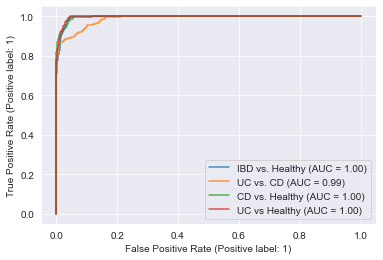

In [100]:
original = [ibd_vs_healthy, uc_vs_cd, cd_vs_healthy, uc_vs_healthy]
all_dfs = []
# Remove CRP
crp_cols = ['crp1', 'crp2', 'crp3', 'crp4', 'crp5']
for df in original:
    df = df.drop(crp_cols, axis=1)
    all_dfs.append(df)

# Test Random Forest on All Datasets
rfcs = []
names = ['IBD vs. Healthy', 'UC vs. CD', 'CD vs. Healthy', 'UC vs Healthy']
for i, df in enumerate(all_dfs):
    X = df.iloc[:, :-1]
    X = X.fillna(0)
    y = df.loc[:, 'ibd_disease_code']
    X_col_names = list(df.columns.values)
    X_col_names = X_col_names[:-1]
    y_col_name = ['disease_code']

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
    rfc.fit(X_train, y_train)
    rfcs.append(rfc)
    ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, name=names[i], alpha=0.8)
    #rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

### Feature Importance IBD vs. Healthy (no CRP)

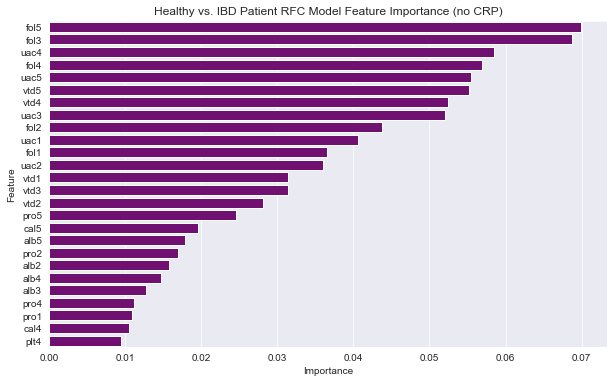

In [141]:
df = ibd_vs_healthy.drop(crp_cols, axis=1)

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='purple').set(ylabel= "Feature", xlabel= "Importance", title="Healthy vs. IBD Patient RFC Model Feature Importance (no CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/nocrp_healthy_ibd_barplot.png', dpi=300)

### Feature Importance UC vs. CD (no CRP)

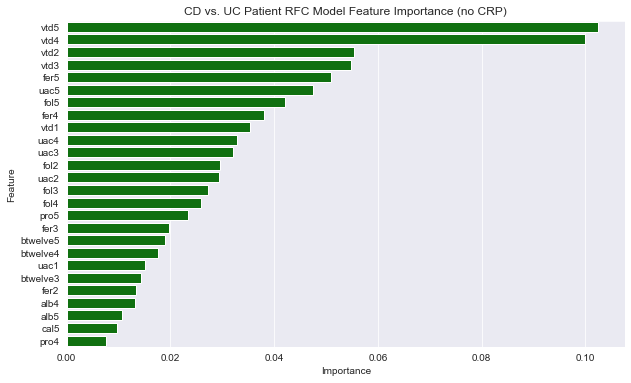

In [140]:
df = uc_vs_cd.drop(crp_cols, axis=1)

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='green').set(ylabel= "Feature", xlabel= "Importance", title="CD vs. UC Patient RFC Model Feature Importance (no CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/nocrp_cd_uc_barplot.png', dpi=300)

### UC vs. Healthy (no CRP)

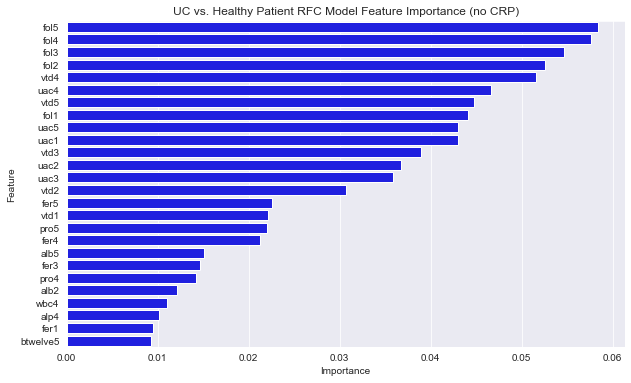

In [139]:
df = uc_vs_healthy.drop(crp_cols, axis=1)

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='blue').set(ylabel= "Feature", xlabel= "Importance", title="UC vs. Healthy Patient RFC Model Feature Importance (no CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/nocrp_uc_healthy_barplot.png', dpi=300)

### CD vs. Healthy (no CRP)

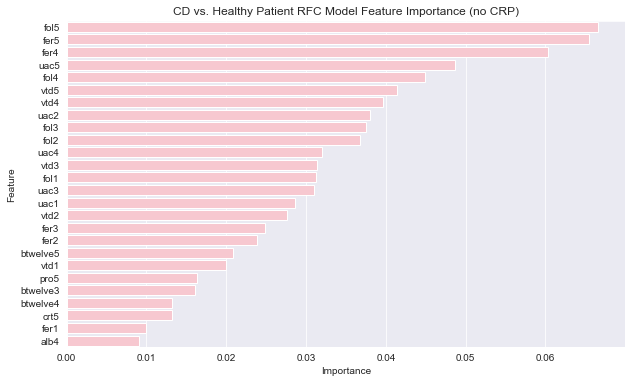

In [138]:
df = cd_vs_healthy.drop(crp_cols, axis=1)

X = df.iloc[:, :-1]
X = X.fillna(0)
y = df.loc[:, 'ibd_disease_code']
X_col_names = list(df.columns.values)
X_col_names = X_col_names[:-1]
y_col_name = ['disease_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_estimators=160, max_features=5, max_depth=5, min_samples_leaf=10)
rfc.fit(X_train, y_train)

feat_imp_df = pd.DataFrame({'feature': X_col_names
                              ,'importance': rfc.feature_importances_})\
                            .sort_values('importance', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
important_feats = feat_imp_df.sort_values('importance', ascending=False).reset_index()
important_feats = important_feats.loc[:25, :]
l = sns.barplot(x=important_feats['importance']
            , y=important_feats['feature']
            , color='pink').set(ylabel= "Feature", xlabel= "Importance", title="CD vs. Healthy Patient RFC Model Feature Importance (no CRP)")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/tree_feature_barplots/nocrp_cd_healthy_barplot.png', dpi=300)

### Model Comparisons

In [149]:
def test_models(df, plot_title, fig_name_path):
    X = df.iloc[:, :-1]
    X = X.fillna(0)
    y = df.loc[:, 'ibd_disease_code']
    X_col_names = list(df.columns.values)
    X_col_names = X_col_names[:-1]
    y_col_name = ['disease_code']

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    names = [
        "Nearest Neighbors",
        "Linear SVM",
        "RBF SVM",
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Neural Net",
        "XGBoost",
        "Naive Bayes",
        "QDA",
    ]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        LogisticRegression(penalty='l2', max_iter=100, C=0.05, n_jobs=-1, random_state=42),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs=-1),
        MLPClassifier(alpha=1, max_iter=1000),
        HistGradientBoostingClassifier(early_stopping=True, max_depth=5),
        GaussianNB(),
        QuadraticDiscriminantAnalysis(),
    ]
    i = 0
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        ax = plt.gca()
        clf_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=names[i], alpha=0.8)
        i+=1
        print(i)
    plt.title(plot_title)
    #plt.figure(figsize=(10,6))
    fig = plt.gcf()
    fig.savefig(fig_name_path, dpi=300)

1
2
3
4
5
6
7
8
9
10


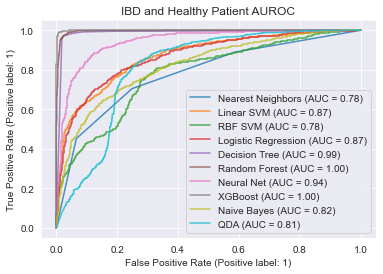

In [157]:
# IBD vs. Healthy (with CRP)
df = ibd_vs_healthy
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/healthy_ibd_models.png'
plot_title = 'IBD and Healthy Patient AUROC'

test_models(ibd_vs_healthy, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


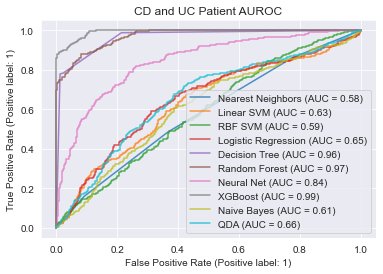

In [156]:
# UC vs. CD (with CRP)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/cd_uc_models.png'
plot_title = 'CD and UC Patient AUROC'

test_models(uc_vs_cd, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


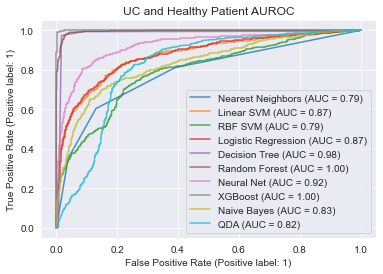

In [155]:
# UC vs. Healthy (with CRP)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/uc_healthy_models.png'
plot_title = 'UC and Healthy Patient AUROC'

test_models(uc_vs_healthy, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


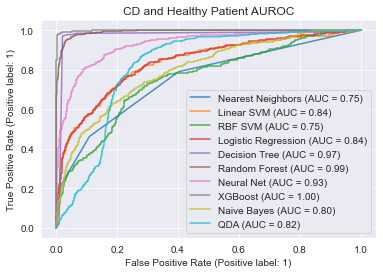

In [154]:
# CD and Healthy (with CRP)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/cd_healthy_models.png'
plot_title = 'CD and Healthy Patient AUROC'

test_models(cd_vs_healthy, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


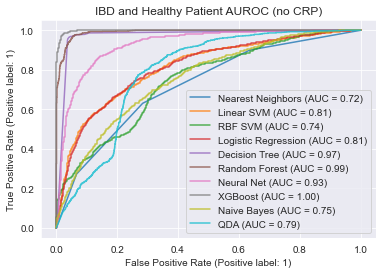

In [153]:
# IBD and Healthy (no CRP)
crp_cols = ['crp1', 'crp2', 'crp3', 'crp4', 'crp5']

df = ibd_vs_healthy.drop(crp_cols, axis=1)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/nocrp_healthy_ibd_models.png'
plot_title = 'IBD and Healthy Patient AUROC (no CRP)'

test_models(df, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


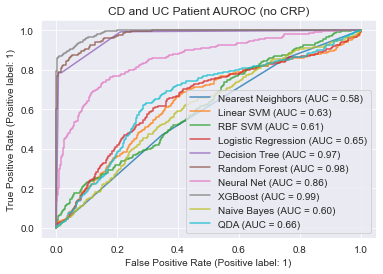

In [152]:
# UC vs. CD (no CRP)

df = uc_vs_cd.drop(crp_cols, axis=1)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/nocrp_cd_uc_models.png'
plot_title = 'CD and UC Patient AUROC (no CRP)'

test_models(df, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


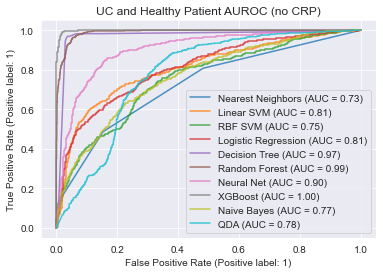

In [151]:
# UC vs. Healthy (no CRP)

df = uc_vs_healthy.drop(crp_cols, axis=1)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/nocrp_uc_healthy_models.png'
plot_title = 'UC and Healthy Patient AUROC (no CRP)'

test_models(df, plot_title, fig_name_path)

1
2
3
4
5
6
7
8
9
10


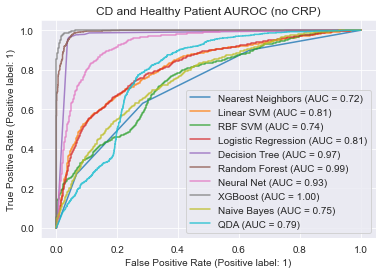

In [150]:
# CD and Healthy (no CRP)

df = ibd_vs_healthy.drop(crp_cols, axis=1)
fig_name_path = '/Users/emmadyer/Desktop/ibd_long_project/figures/model_figs/nocrp_cd_healthy_models.png'
plot_title = 'CD and Healthy Patient AUROC (no CRP)'

test_models(df, plot_title, fig_name_path)